# Chapter 13
# Survival Analysis

Survival analysis is used to assess how long things last; more generally, we can think of this as looking at intervals in time before an event happens.

### 13.1 Survival Curves

Survival is assessed using a *survival curve*, S(t). This is a function that maps from a duration, t, to the probability of surviving longer than t. If we know the distribution of durations we can calculate the survival curve as the complement of the CDF:

$$ S(t) = 1 - CDF(t) $$

CDF(t) is the probability of a lifetime $\leqslant$ t.

Let's look at an example: in the NSFG data, we have information on the duration of 11189 pregnancies.

In [1]:
import nsfg
import thinkstats2
import thinkplot

In [2]:
preg = nsfg.ReadFemPreg()

In [4]:
complete = preg.query('outcome in [1, 3, 4]').prglngth #live births, stillbirths and miscarriages only

In [25]:
cdf = thinkstats2.Cdf(complete, label='cdf')

Now we need to transform the CDF into the survival function (SF). We do this by making a new class, **SurvivalFunction**.

In [19]:
class SurvivalFunction(object):
    def __init__(self, cdf, label=''):
        self.cdf = cdf
        self.label = label or cdf.label
    @property
    def ts(self):
        return self.cdf.xs
    
    @property
    def ss(self):
        return 1-self.cdf.ps
    
    def __getitem__(self, t):
        return self.Prob(t)
    
    def Prob(self, t):
        return 1 - self.cdf.Prob(t)

Properties are methods that can be invoked as if they are variables. This class provides two: ts, the sequence of lifetimes and ss, the survival curve.

**__getitem__** and **Prob** evaluate the survival curve, so **sf[t]** tells us the number of pregnancies that proceed after t weeks.

In [29]:
sf = SurvivalFunction(cdf)

For plotting purposes, we'll use the ThinkStats2 version of **SurvivalFunction** as it provides **Render** and so lets us use **thinkplot**.  

In [21]:
import survival

In [30]:
sf = survival.SurvivalFunction(sf.ts, sf.ss)

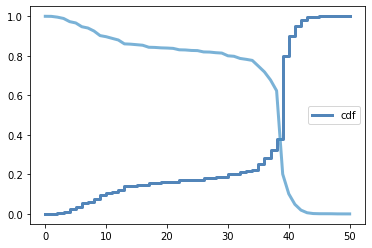

<Figure size 576x432 with 0 Axes>

In [32]:
thinkplot.PrePlot(2)
thinkplot.Cdf(cdf)
thinkplot.Plot(sf)
thinkplot.Show()

### 13.2 Hazard Function

Next, we look at the *hazard function*. This maps from a time to the fraction of events that happen at this time.

$$ \lambda(t) = \frac{S(t) - S(t+1)}{S(t)} $$

The numerator is the fraction of lifetimes that end at t, a.k.a. PMF(t).

SurvivalFunction provides **MakeHazardFunction** to calculate this. This version is only valid on data with equally spaced t values.

In [38]:
hf = sf.MakeHazardFunction(label = 'hf')

**HazardFunction** is a wrapper for a pandas Series. It can take any type that can initialise a Series.

Like **SurvivalFunction** it also provides **__getitem__**.

In [42]:
hf[40] #nb this is the value given for 39 weeks in the book, reason for the difference is unclear.

0.49689440993788797

This means that of all pregnancies that proceed to week 40, around 50% end that week.

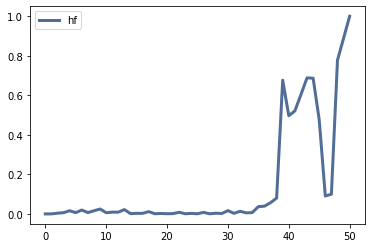

<Figure size 576x432 with 0 Axes>

In [44]:
thinkplot.Plot(hf)
thinkplot.Show()

After week 42 the hazard function becomes erratic due to the small number of cases. Before that we see the expected behaviour: a peak at around 39 weeks, and a slight decrease from the first to second trimesters.